<a href="https://colab.research.google.com/github/ZynTran/test/blob/main/khaycom_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub

In [3]:
image_size = 64
dishes_classes = ['Chicken', 'Egg', 'Fish', 'Fruit', 'Meat', 'Rice', 'Shrimp', 'Soup', 'Soya-cake', 'Vegetable']

In [4]:
path = kagglehub.dataset_download("ppduyn/tnh-tin-cm")

100%|██████████| 10.9M/10.9M [00:01<00:00, 9.56MB/s]

Extracting files...


In [5]:

# ----------------------- TĂNG CƯỜNG DỮ LIỆU THỦ CÔNG -----------------------
def augment_image(img):
    """Tạo các phiên bản biến thể của ảnh để tăng cường dữ liệu."""
    augmented = [img]

    # Flip ngang
    flipped_lr = cv2.flip(img, 1)
    augmented.append(flipped_lr)

    # Flip dọc
    flipped_ud = cv2.flip(img, 0)
    augmented.append(flipped_ud)

    # Rotate 90, 180, 270 độ
    rotated_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    rotated_180 = cv2.rotate(img, cv2.ROTATE_180)
    rotated_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    augmented.extend([rotated_90, rotated_180, rotated_270])

    return augmented

# ----------------------- LOAD ẢNH VÀ AUGMENT -----------------------
data, labels = [], []

for i, dishes in enumerate(dishes_classes):
    folder = os.path.join(path, 'tính tiền cơm', dishes)
    if not os.path.isdir(folder):
        continue
    filenames = os.listdir(folder)
    random.shuffle(filenames)
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            augmented_images = augment_image(img)
            for aug_img in augmented_images:
                data.append(aug_img)
                labels.append(i)
        except:
            continue

# ----------------------- TIỀN XỬ LÝ -----------------------
data = np.array(data)
labels = to_categorical(labels, num_classes=len(dishes_classes))

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# ----------------------- IMAGE DATA GENERATOR -----------------------
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.1737 - loss: 2.2892 - val_accuracy: 0.2417 - val_loss: 1.9975
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - accuracy: 0.3903 - loss: 1.6793 - val_accuracy: 0.4861 - val_loss: 1.3964
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.4385 - loss: 1.4953 - val_accuracy: 0.4944 - val_loss: 1.3905
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.4733 - loss: 1.4237 - val_accuracy: 0.5222 - val_loss: 1.2498
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.4987 - loss: 1.3429 - val_accuracy: 0.5194 - val_loss: 1.3639
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step - accuracy: 0.5621 - loss: 1.2175 - val_accuracy: 0.5028 - val_loss: 1.2391
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.5668 - loss: 1.1431 - val_accuracy: 0.5556 - val_loss: 1.1353
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 192ms/step - accuracy: 0.5743 - loss: 1.1433 - val_accuracy: 0.586

✅ Đã lưu model thành công!
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step

🔍 Classification Report:
              precision    recall  f1-score   support

     Chicken       0.47      0.54      0.50        28
         Egg       0.82      0.66      0.73        41
        Fish       0.54      0.98      0.70        44
       Fruit       0.89      0.68      0.77        37
        Meat       0.67      0.69      0.68        32
        Rice       0.97      0.94      0.95        32
      Shrimp       0.96      0.73      0.83        30
        Soup       0.92      0.59      0.72        39
   Soya-cake       0.68      0.42      0.52        40
   Vegetable       0.73      1.00      0.84        37

    accuracy                           0.72       360
   macro avg       0.76      0.72      0.72       360
weighted avg       0.76      0.72      0.72       360



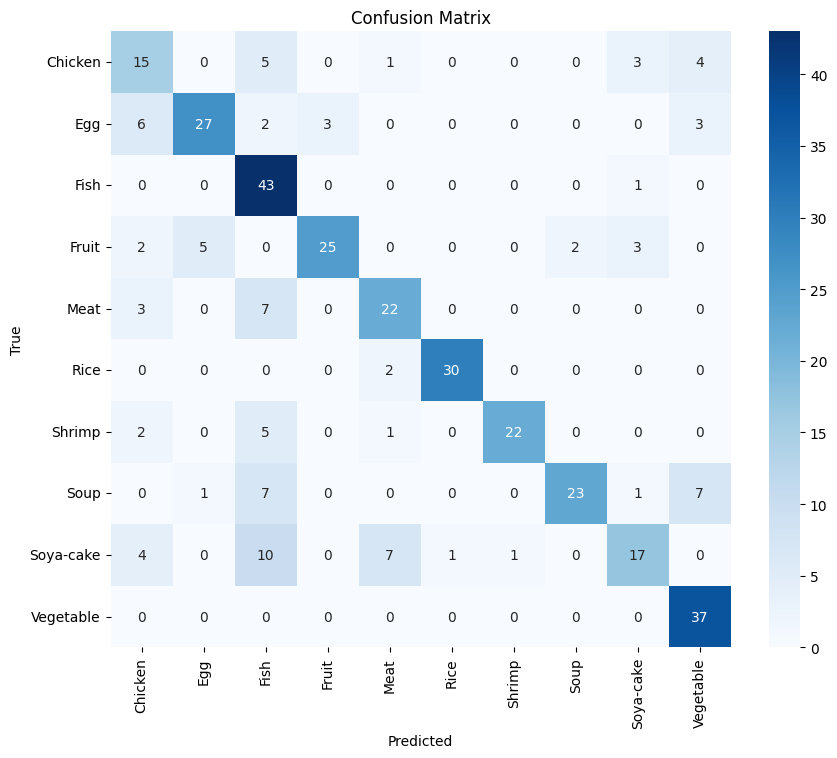

In [6]:
# ----------------------- XÂY DỰNG MÔ HÌNH CNN -----------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(528, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(dishes_classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------- HUẤN LUYỆN MÔ HÌNH -----------------------
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=16),
    epochs=15,
    validation_data=(X_test, y_test)
)

# ----------------------- LƯU MÔ HÌNH -----------------------
model.save('model.h5')
print("✅ Đã lưu model thành công!")

# ----------------------- ĐÁNH GIÁ MÔ HÌNH -----------------------
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n🔍 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=dishes_classes))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dishes_classes, yticklabels=dishes_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:01<00:00, 68.9MB/s]



0: 640x640 3 bowls, 5773.0ms
Speed: 8.8ms preprocess, 5773.0ms inference, 35.2ms postprocess per image at shape (1, 3, 640, 640)
🧾 Tổng tiền: 13,000 VND


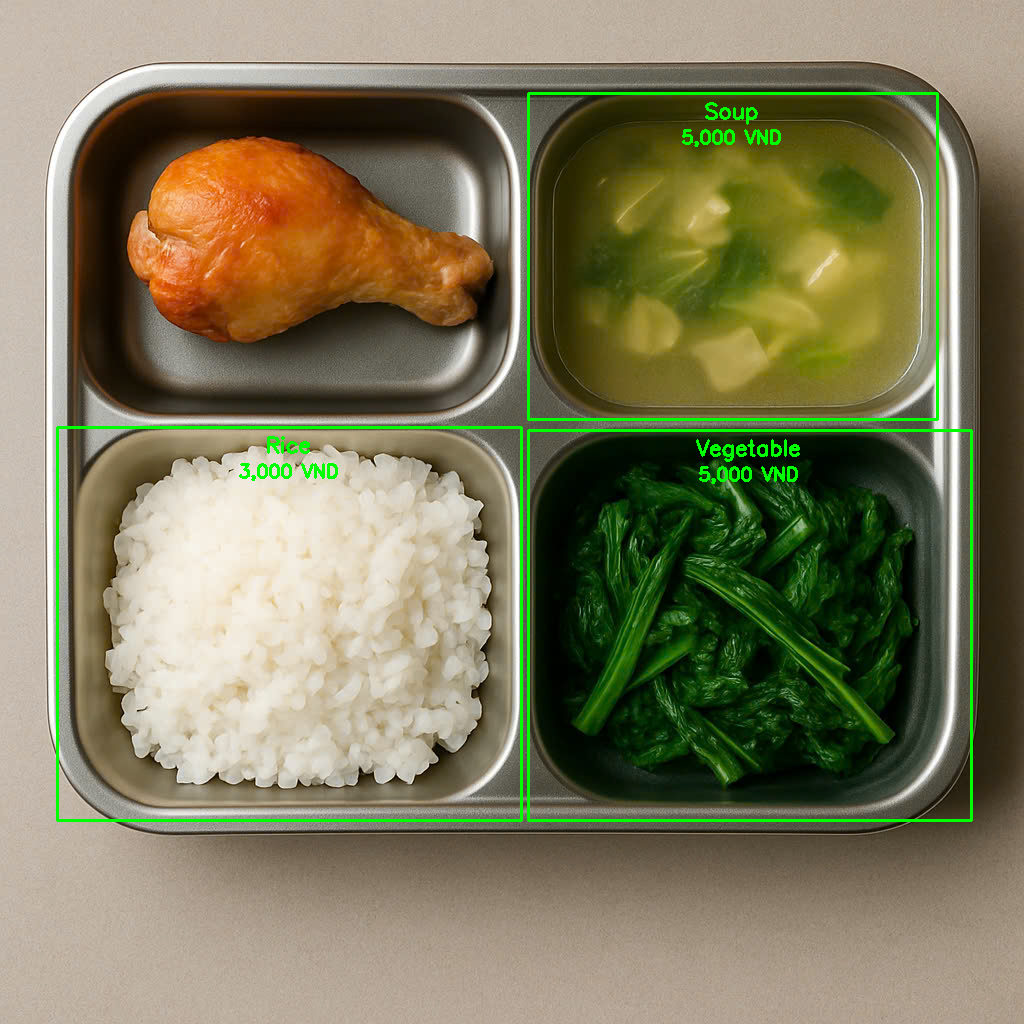

In [7]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
IMG_PATH = "/content/khay2.jpg"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
CLF_MODEL_PATH = "/content/model.h5"
yolo_model = YOLO(YOLO_MODEL_PATH)
clf_model = load_model(CLF_MODEL_PATH)
dishes_classes = ['Chicken', 'Egg', 'Fish', 'Fruit', 'Meat', 'Rice', 'Shrimp', 'Soup', 'Soya-cake', 'Vegetable']
PRICE_TABLE = {
    'Rice': 3000,
    'Chicken': 15000,
    'Fish': 15000,
    'Egg': 5000,
    'Meat': 15000,
    'Shrimp': 15000,
    'Soup': 5000,
    'Vegetable': 5000,
    'Fruit': 5000,
    'Soya-cake': 3000
}
def classify_crop(img_crop):
    if img_crop is None or img_crop.shape[0] == 0 or img_crop.shape[1] == 0:
        return "Unknown", 0.0
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255.0
        x = img.reshape(1, 64, 64, 3)
        preds = clf_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return dishes_classes[idx], conf
    except:
        return "Error", 0.0
img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    total_price = 0

    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = classify_crop(crop)
        price = PRICE_TABLE.get(label, 0)
        if label not in ["Unknown", "Error"] and conf >= 0.5:
            total_price += price
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        if label != "Unknown":
            text_label = f"{label}"
            text_price = f"{price:,} VND"
            label_size = cv2.getTextSize(text_label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
            price_size = cv2.getTextSize(text_price, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]

            label_x = x1 + (x2 - x1 - label_size[0]) // 2
            price_x = x1 + (x2 - x1 - price_size[0]) // 2
            text_y = y1 + 25
            price_y = text_y + 25
            cv2.putText(img_draw, text_label, (label_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
            cv2.putText(img_draw, text_price, (price_x, price_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    print(f"🧾 Tổng tiền: {total_price:,} VND")
    cv2_imshow(img_draw)

In [8]:
import cv2
import numpy as np
import os
from ultralytics import YOLO

def crop_objects_from_image(image_path, output_folder, confidence_threshold=0.5):
    """
    Phát hiện đối tượng bằng YOLO và cắt chúng từ ảnh gốc

    Args:
        image_path: Đường dẫn tới ảnh cần xử lý
        output_folder: Thư mục để lưu ảnh đã cắt
        confidence_threshold: Ngưỡng tin cậy để phát hiện đối tượng
    """
    # Tạo thư mục đầu ra nếu chưa tồn tại
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Tải model YOLO (sử dụng YOLOv8n mặc định)
    model = YOLO("yolov8n.pt")

    # Đọc ảnh
    img = cv2.imread(image_path)
    if img is None:
        print(f"Không thể đọc ảnh từ {image_path}")
        return

    # Lưu thông tin ảnh gốc
    original_height, original_width = img.shape[:2]

    # Dự đoán đối tượng
    results = model(img, conf=confidence_threshold)

    # Xử lý kết quả dự đoán
    detections = results[0]

    # Lấy tên file gốc (không có phần mở rộng) để đặt tên cho các file đã cắt
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    # Đếm số đối tượng được phát hiện
    object_count = 0

    # Duyệt qua từng đối tượng được phát hiện
    for i, detection in enumerate(detections.boxes.data.tolist()):
        # Lấy tọa độ bounding box, độ tin cậy và lớp
        x1, y1, x2, y2, confidence, class_id = detection

        # Chuyển sang kiểu số nguyên
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Lấy tên lớp
        class_name = detections.names[int(class_id)]

        # Cắt đối tượng từ ảnh gốc
        cropped_object = img[y1:y2, x1:x2]

        # Bỏ qua nếu ảnh cắt quá nhỏ
        if cropped_object.size == 0:
            continue

        # Lưu ảnh đã cắt
        output_path = os.path.join(output_folder, f"{base_name}_{class_name}_{object_count}.jpg")
        cv2.imwrite(output_path, cropped_object)
        print(f"Đã lưu đối tượng {class_name} ({confidence:.2f}) vào {output_path}")

        object_count += 1

    print(f"Hoàn thành! Đã cắt {object_count} đối tượng từ ảnh.")

# Ví dụ sử dụng
if __name__ == "__main__":
    # Đường dẫn đến ảnh cần xử lý
    image_path = "/content/khay2.jpg"

    # Thư mục để lưu các đối tượng đã cắt
    output_folder = "cropped_objects"

    # Gọi hàm để cắt đối tượng
    crop_objects_from_image(image_path, output_folder, confidence_threshold=0.5)

100%|██████████| 6.25M/6.25M [00:00<00:00, 19.7MB/s]



0: 640x640 4 bowls, 984.9ms
Speed: 26.2ms preprocess, 984.9ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 640)
Đã lưu đối tượng bowl (0.87) vào cropped_objects/khay2_bowl_0.jpg
Đã lưu đối tượng bowl (0.74) vào cropped_objects/khay2_bowl_1.jpg
Đã lưu đối tượng bowl (0.65) vào cropped_objects/khay2_bowl_2.jpg
Đã lưu đối tượng bowl (0.61) vào cropped_objects/khay2_bowl_3.jpg
Hoàn thành! Đã cắt 4 đối tượng từ ảnh.



0: 480x640 3 bowls, 1 dining table, 337.5ms
Speed: 7.6ms preprocess, 337.5ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)
✅ Đã lưu bowl (0.77) vào cropped_objects/dia3_bowl_0.jpg


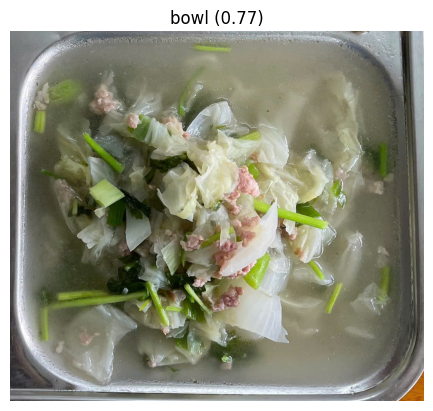

✅ Đã lưu dining table (0.73) vào cropped_objects/dia3_dining table_1.jpg


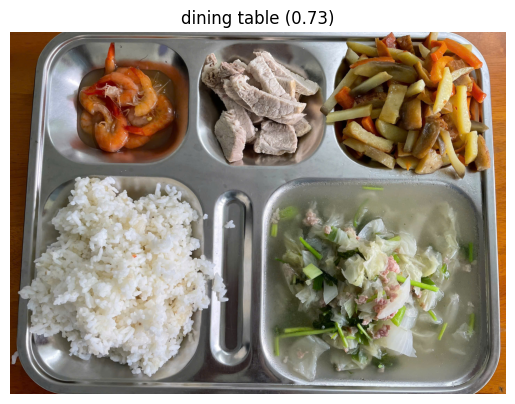

✅ Đã lưu bowl (0.63) vào cropped_objects/dia3_bowl_2.jpg


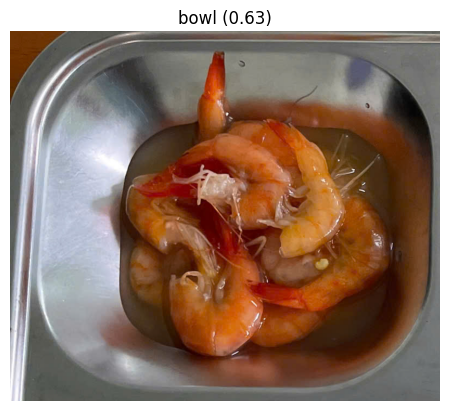

✅ Đã lưu bowl (0.62) vào cropped_objects/dia3_bowl_3.jpg


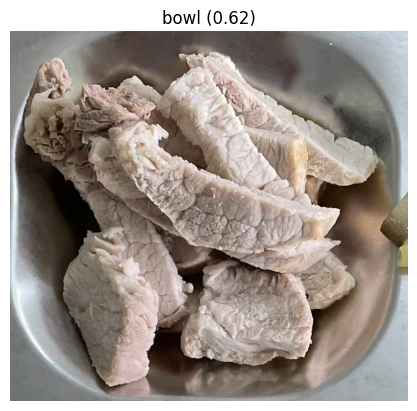

🎉 Hoàn thành! Đã cắt và lưu 4 đối tượng từ ảnh.


In [14]:
import cv2
import numpy as np
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

def crop_objects_from_image(image_path, output_folder, confidence_threshold=0.5):
    """
    Phát hiện đối tượng bằng YOLOv8 và cắt chúng từ ảnh gốc, sau đó hiển thị từng ảnh đã cắt.

    Args:
        image_path: Đường dẫn tới ảnh cần xử lý
        output_folder: Thư mục để lưu ảnh đã cắt
        confidence_threshold: Ngưỡng tin cậy để phát hiện đối tượng
    """
    # Tạo thư mục đầu ra nếu chưa tồn tại
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Tải model YOLOv8n (model nhẹ)
    model = YOLO("yolov8n.pt")

    # Đọc ảnh
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Không thể đọc ảnh từ {image_path}")
        return

    # Dự đoán đối tượng
    results = model(img, conf=confidence_threshold)
    detections = results[0]

    # Lấy tên file gốc (không có phần mở rộng)
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    # Đếm số đối tượng được phát hiện
    object_count = 0

    # Duyệt qua từng đối tượng được phát hiện
    for i, detection in enumerate(detections.boxes.data.tolist()):
        x1, y1, x2, y2, confidence, class_id = detection
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        class_name = detections.names[int(class_id)]

        # Cắt ảnh đối tượng
        cropped_object = img[y1:y2, x1:x2]

        if cropped_object.size == 0:
            continue

        # Lưu ảnh đã cắt
        output_path = os.path.join(output_folder, f"{base_name}_{class_name}_{object_count}.jpg")
        cv2.imwrite(output_path, cropped_object)
        print(f"✅ Đã lưu {class_name} ({confidence:.2f}) vào {output_path}")

        # Hiển thị ảnh đã cắt bằng matplotlib
        plt.imshow(cv2.cvtColor(cropped_object, cv2.COLOR_BGR2RGB))
        plt.title(f"{class_name} ({confidence:.2f})")
        plt.axis('off')
        plt.show()

        object_count += 1

    print(f"🎉 Hoàn thành! Đã cắt và lưu {object_count} đối tượng từ ảnh.")

# ---------------------- Ví dụ sử dụng ----------------------
if __name__ == "__main__":
    image_path = "/content/dia3.jpg"         # Thay bằng đường dẫn ảnh của bạn
    output_folder = "cropped_objects"         # Thư mục lưu kết quả
    crop_objects_from_image(image_path, output_folder, confidence_threshold=0.5)
